In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

# Task 5: обогащение и трансформации

Отлично. Но чем больше у вас данных, тем более качественный анализ можно выполнить. Давайте обогатим наш изначальный набор данных.

<h2>
1. Прочитайте файл JSON, который вы сохранили в упражнении 3.

- Один из столбцов имеет тип float, поэтому для более красивого вида давайте определим его формат отображения в библиотеке Pandas, используя pd.options.display.float_format: числа с плавающей запятой должны отображаться с точностью до двух десятичных знаков.
- С пропущенными значениями моделей автомобилей ничего не нужно делать.

- [Options and settings](https://pandas.pydata.org/docs/user_guide/options.html)
- [How to display pandas DataFrame of floats using a format string for columns?](https://stackoverflow.com/questions/20937538/how-to-display-pandas-dataframe-of-floats-using-a-format-string-for-columns)

In [7]:
df = pd.read_json("/content/drive/MyDrive/School21/day10/task5/data/auto.json", orient="records")
df

,CarNumber,Refund,Fines,Make,Model
0,Y163O8161RUS,2,3200.000000,Ford,Focus
1,E432XX77RUS,1,6500.000000,Toyota,Camry
2,7184TT36RUS,1,2100.000000,Ford,Focus
3,X582HE161RUS,2,2000.000000,Ford,Focus
4,92918M178RUS,1,5700.000000,Ford,Focus
...,...,...,...,...,...
720,Y163O8161RUS,2,1600.000000,Ford,Focus
721,M0309X197RUS,1,22300.000000,Ford,Focus
722,O673E8197RUS,2,600.000000,Ford,Focus
723,8610T8154RUS,1,2000.000000,Ford,Focus


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CarNumber  725 non-null    object 
 1   Refund     725 non-null    int64  
 2   Fines      725 non-null    float64
 3   Make       725 non-null    object 
 4   Model      716 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 28.4+ KB


In [9]:
# Один из столбцов имеет тип float, поэтому для более красивого вида давайте определим его формат отображения в библиотеке Pandas, 
# используя pd.options.display.float_format: числа с плавающей запятой должны отображаться с точностью до двух десятичных знаков.

pd.options.display.float_format = '{:.2f}'.format

In [10]:
df

,CarNumber,Refund,Fines,Make,Model
0,Y163O8161RUS,2,3200.00,Ford,Focus
1,E432XX77RUS,1,6500.00,Toyota,Camry
2,7184TT36RUS,1,2100.00,Ford,Focus
3,X582HE161RUS,2,2000.00,Ford,Focus
4,92918M178RUS,1,5700.00,Ford,Focus
...,...,...,...,...,...
720,Y163O8161RUS,2,1600.00,Ford,Focus
721,M0309X197RUS,1,22300.00,Ford,Focus
722,O673E8197RUS,2,600.00,Ford,Focus
723,8610T8154RUS,1,2000.00,Ford,Focus


<h2>
2. Дополните датафрейм, создав синтетические данные, используя выборку из этого же датафрейма.

- Создайте выборку с 200 новыми наблюдениями со значением random_state = 21.

  * В выборке не должно быть новых комбинаций регистрационного номера автомобиля, марки и модели, с точки зрения этих терминов весь набор данных будет согласован.
  * Ограничения на возмещение и штрафы отсутствуют, вы можете взять любое значение из этих столбцов наугад и использовать его для любого регистрационного номера автомобиля.


- Склейте полученную выборку с исходным датафреймом и сохраните в новый датафрейм concat_rows.

- [pandas.DataFrame.sample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html)
- [pandas.concat](https://pandas.pydata.org/docs/reference/api/pandas.concat.html)

In [11]:
synthetic_data = df[['CarNumber', 'Make', 'Model']].sample(n=200, random_state=21)
synthetic_data

,CarNumber,Make,Model
445,M0299X197RUS,Ford,Focus
22,83298C154RUS,Ford,Focus
93,H957HY161RUS,Ford,Focus
173,T941CC96RUS,Ford,Focus
697,H966HY161RUS,Ford,Focus
...,...,...,...
14,8182XX154RUS,Ford,Focus
623,X796TH96RUS,Ford,Focus
498,T011MY163RUS,Ford,Focus
536,T341CC96RUS,Volkswagen,Passat


In [12]:
synthetic_data['Refund'] = df['Refund'].sample(n=200, random_state=21)
synthetic_data['Fines'] = df['Fines'].sample(n=200, random_state=21)
synthetic_data

,CarNumber,Make,Model,Refund,Fines
445,M0299X197RUS,Ford,Focus,2,19200.00
22,83298C154RUS,Ford,Focus,2,8594.59
93,H957HY161RUS,Ford,Focus,1,2000.00
173,T941CC96RUS,Ford,Focus,1,2000.00
697,H966HY161RUS,Ford,Focus,1,500.00
...,...,...,...,...,...
14,8182XX154RUS,Ford,Focus,1,200.00
623,X796TH96RUS,Ford,Focus,1,500.00
498,T011MY163RUS,Ford,Focus,2,4000.00
536,T341CC96RUS,Volkswagen,Passat,2,1000.00


In [13]:
concat_rows = pd.concat([df, synthetic_data], ignore_index=True)
concat_rows

,CarNumber,Refund,Fines,Make,Model
0,Y163O8161RUS,2,3200.00,Ford,Focus
1,E432XX77RUS,1,6500.00,Toyota,Camry
2,7184TT36RUS,1,2100.00,Ford,Focus
3,X582HE161RUS,2,2000.00,Ford,Focus
4,92918M178RUS,1,5700.00,Ford,Focus
...,...,...,...,...,...
920,8182XX154RUS,1,200.00,Ford,Focus
921,X796TH96RUS,1,500.00,Ford,Focus
922,T011MY163RUS,2,4000.00,Ford,Focus
923,T341CC96RUS,2,1000.00,Volkswagen,Passat


In [14]:
concat_rows.count()

CarNumber    925
Refund       925
Fines        925
Make         925
Model        914
dtype: int64

<h2>
3. Дополните датафрейм concat_rows новым столбцом со следующими сгенерированными данными.

- Создайте пандасовскую series с именем Year, используя случайные целые числа с 1980 по 2019.
- Используйте np.random.seed(21) перед генерацией значений лет.
- Соедините серию с датафреймом и назовите новый датафрейм fines.

- [numpy.random.seed](https://pyprog.pro/random_sampling_functions/seed.html)
- [numpy.random.randint](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html)

In [15]:
import numpy as np

In [16]:
np.random.seed(21)
Year = pd.Series(np.random.randint(low=1980, high=2019, size=925), name='Year')
Year

0      1989
1      1995
2      1984
3      2015
4      2014
       ... 
920    1996
921    2002
922    1996
923    2012
924    1984
Name: Year, Length: 925, dtype: int64

In [17]:
fines = concat_rows.join(Year)
fines

,CarNumber,Refund,Fines,Make,Model,Year
0,Y163O8161RUS,2,3200.00,Ford,Focus,1989
1,E432XX77RUS,1,6500.00,Toyota,Camry,1995
2,7184TT36RUS,1,2100.00,Ford,Focus,1984
3,X582HE161RUS,2,2000.00,Ford,Focus,2015
4,92918M178RUS,1,5700.00,Ford,Focus,2014
...,...,...,...,...,...,...
920,8182XX154RUS,1,200.00,Ford,Focus,1996
921,X796TH96RUS,1,500.00,Ford,Focus,2002
922,T011MY163RUS,2,4000.00,Ford,Focus,1996
923,T341CC96RUS,2,1000.00,Volkswagen,Passat,2012


In [18]:
fines.count()

CarNumber    925
Refund       925
Fines        925
Make         925
Model        914
Year         925
dtype: int64

<h2>
4. Обогатите датафрейм данными из другого источника.

- Создайте новый датафрейм с регистрационными номерами автомобилей и их владельцами.

  * Используйте самые популярные в США фамилии – файл **(surname.json)**.
  * Создайте новую series с этими фамилиями (они не должны включать специальные символы, такие как запятые, скобки и т.д.). Их количество должно равняться количеству уникальных регистрационных номеров автомобилей, используйте семплирование (random_state = 21).
  * Создайте в итоге датафрейм owners с двумя столбцами: CarNumber и SURNAME.


- Добавьте еще пять наблюдений в датафрейм fines (придумайте свой собственный вариант для CarNumber и т. д.).
- Удалите последние 20 наблюдений из owners и добавьте три своих новых придуманных наблюдения (они не совпадают с теми, которые вы добавляете к датафрейму fines).
- Объедините оба датафрейма (их столбцы должны составить один единый датафрейм):

  * новый датафрейм должен содержать только те регистрационные номера автомобилей, которые существуют в обоих датафреймах;
  * новый датафрейм должен содержать все регистрационные номера автомобилей, которые существуют в обоих датафреймах;
  * новый датафрейм должен содержать только регистрационные номера автомобилей из пакета данных fines;
  * новый датафрейм должен содержать только регистрационные номера автомобилей из пакета данных owners.

- [pandas.DataFrame.loc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)
- [Как создать pandas DataFrame](https://ivan.bessarabov.ru/blog/how-to-create-pandas-dataframe)
- [pandas.DataFrame.merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html)

  - **Создайте новый датафрейм с регистрационными номерами автомобилей и их владельцами**

In [22]:
# Используйте самые популярные в США фамилии – файл (surname.json)

df_2 = pd.read_json("/content/drive/MyDrive/School21/day10/task5/data/surname.json", orient="records")
df_2

,0,1,2
0,NAME,COUNT,RANK
1,ADAMS,427865,42
2,ALLEN,482607,33
3,ALVAREZ,233983,92
4,ANDERSON,784404,15
...,...,...,...
96,WILLIAMS,1625252,3
97,WILSON,801882,14
98,WOOD,250715,84
99,WRIGHT,458980,35


In [23]:
# Создайте новую series с этими фамилиями (они не должны включать специальные символы, такие как запятые, скобки и т.д.). 
# Их количество должно равняться количеству уникальных регистрационных номеров автомобилей, используйте семплирование (random_state = 21).

col_df_2 = df_2.loc[0, :] 
col_df_2

0     NAME
1    COUNT
2     RANK
Name: 0, dtype: object

In [24]:
df_2 = df_2.loc[1:, :]
df_2

,0,1,2
1,ADAMS,427865,42
2,ALLEN,482607,33
3,ALVAREZ,233983,92
4,ANDERSON,784404,15
5,BAILEY,277845,72
...,...,...,...
96,WILLIAMS,1625252,3
97,WILSON,801882,14
98,WOOD,250715,84
99,WRIGHT,458980,35


In [25]:
df_2.columns = col_df_2
df_2

,NAME,COUNT,RANK
1,ADAMS,427865,42
2,ALLEN,482607,33
3,ALVAREZ,233983,92
4,ANDERSON,784404,15
5,BAILEY,277845,72
...,...,...,...
96,WILLIAMS,1625252,3
97,WILSON,801882,14
98,WOOD,250715,84
99,WRIGHT,458980,35


In [26]:
nun_acto = df.CarNumber.nunique()
nun_acto

531

In [27]:
series_surname = df_2.NAME.sample(nun_acto, random_state=21, replace=True, ignore_index=True)
series_surname

0      RICHARDSON
1            ROSS
2          MORGAN
3          BAILEY
4           LOPEZ
          ...    
526      CAMPBELL
527          HALL
528         BAKER
529          DIAZ
530        MORGAN
Name: NAME, Length: 531, dtype: object

In [28]:
# Создайте в итоге датафрейм owners с двумя столбцами: CarNumber и SURNAME.

un_avto = df.CarNumber.unique()
#un_avto

In [29]:
owners = pd.DataFrame({'CarNumber': un_avto, 'SURNAME': series_surname})
owners

,CarNumber,SURNAME
0,Y163O8161RUS,RICHARDSON
1,E432XX77RUS,ROSS
2,7184TT36RUS,MORGAN
3,X582HE161RUS,BAILEY
4,92918M178RUS,LOPEZ
...,...,...
526,O136HO197RUS,CAMPBELL
527,O22097197RUS,HALL
528,M0309X197RUS,BAKER
529,O673E8197RUS,DIAZ


- **Добавьте еще пять наблюдений в датафрейм fines (придумайте свой собственный вариант для CarNumber и т. д.).**

In [30]:
fines.columns

Index(['CarNumber', 'Refund', 'Fines', 'Make', 'Model', 'Year'], dtype='object')

In [31]:
fines

,CarNumber,Refund,Fines,Make,Model,Year
0,Y163O8161RUS,2,3200.00,Ford,Focus,1989
1,E432XX77RUS,1,6500.00,Toyota,Camry,1995
2,7184TT36RUS,1,2100.00,Ford,Focus,1984
3,X582HE161RUS,2,2000.00,Ford,Focus,2015
4,92918M178RUS,1,5700.00,Ford,Focus,2014
...,...,...,...,...,...,...
920,8182XX154RUS,1,200.00,Ford,Focus,1996
921,X796TH96RUS,1,500.00,Ford,Focus,2002
922,T011MY163RUS,2,4000.00,Ford,Focus,1996
923,T341CC96RUS,2,1000.00,Volkswagen,Passat,2012


In [32]:
df_new_5 = pd.DataFrame({'CarNumber': ['A0634X199RUS', 'B6734X190RUS', 'V0799X177RUS', 'G7345X197RUS', 'D0011X50RUS'], 
                        'Refund': [1, 2, 3, 2, 1],
                        'Fines': [500.00, 3000.00, 6000.00, 1000.00, 5000.00],
                        'Make': ['Audi', 'BMW', 'Infiniti', 'Lexus', 'Mitsubishi'],
                        'Model': ['Q3', 'X1', 'QX70', 'CT','ASX'],
                        'Year': ['2014', '2018', '2016', '2011','2019']
                        })
df_new_5

,CarNumber,Refund,Fines,Make,Model,Year
0,A0634X199RUS,1,500.00,Audi,Q3,2014
1,B6734X190RUS,2,3000.00,BMW,X1,2018
2,V0799X177RUS,3,6000.00,Infiniti,QX70,2016
3,G7345X197RUS,2,1000.00,Lexus,CT,2011
4,D0011X50RUS,1,5000.00,Mitsubishi,ASX,2019


In [33]:
fines = pd.concat([fines, df_new_5], ignore_index=True)
fines.tail(10)

,CarNumber,Refund,Fines,Make,Model,Year
920,8182XX154RUS,1,200.00,Ford,Focus,1996
921,X796TH96RUS,1,500.00,Ford,Focus,2002
922,T011MY163RUS,2,4000.00,Ford,Focus,1996
923,T341CC96RUS,2,1000.00,Volkswagen,Passat,2012
924,T119CT96RUS,1,2000.00,Ford,Focus,1984
925,A0634X199RUS,1,500.00,Audi,Q3,2014
926,B6734X190RUS,2,3000.00,BMW,X1,2018
927,V0799X177RUS,3,6000.00,Infiniti,QX70,2016
928,G7345X197RUS,2,1000.00,Lexus,CT,2011
929,D0011X50RUS,1,5000.00,Mitsubishi,ASX,2019


In [34]:
fines

,CarNumber,Refund,Fines,Make,Model,Year
0,Y163O8161RUS,2,3200.00,Ford,Focus,1989
1,E432XX77RUS,1,6500.00,Toyota,Camry,1995
2,7184TT36RUS,1,2100.00,Ford,Focus,1984
3,X582HE161RUS,2,2000.00,Ford,Focus,2015
4,92918M178RUS,1,5700.00,Ford,Focus,2014
...,...,...,...,...,...,...
925,A0634X199RUS,1,500.00,Audi,Q3,2014
926,B6734X190RUS,2,3000.00,BMW,X1,2018
927,V0799X177RUS,3,6000.00,Infiniti,QX70,2016
928,G7345X197RUS,2,1000.00,Lexus,CT,2011


- **Удалите последние 20 наблюдений из owners и добавьте три своих новых придуманных наблюдения (они не совпадают с теми, которые вы добавляете к датафрейму fines).**

In [35]:
owners

,CarNumber,SURNAME
0,Y163O8161RUS,RICHARDSON
1,E432XX77RUS,ROSS
2,7184TT36RUS,MORGAN
3,X582HE161RUS,BAILEY
4,92918M178RUS,LOPEZ
...,...,...
526,O136HO197RUS,CAMPBELL
527,O22097197RUS,HALL
528,M0309X197RUS,BAKER
529,O673E8197RUS,DIAZ


In [36]:
owners.drop(owners.tail(20).index,inplace=True)
owners

,CarNumber,SURNAME
0,Y163O8161RUS,RICHARDSON
1,E432XX77RUS,ROSS
2,7184TT36RUS,MORGAN
3,X582HE161RUS,BAILEY
4,92918M178RUS,LOPEZ
...,...,...
506,T914CT197RUS,HERNANDEZ
507,E41977152RUS,BAKER
508,9464EX178RUS,MARTIN
509,O50197197RUS,WRIGHT


In [37]:
df_new_3 = pd.DataFrame({'CarNumber': ['E0001X77RUS', 'G0777X750RUS', 'K0666X797RUS'], 
                        'SURNAME': ['JOSE', 'SONDRA', 'SAMUEL']
                        })
df_new_3

,CarNumber,SURNAME
0,E0001X77RUS,JOSE
1,G0777X750RUS,SONDRA
2,K0666X797RUS,SAMUEL


In [38]:
owners = pd.concat([owners, df_new_3], ignore_index=True)
owners.tail(5)

,CarNumber,SURNAME
509,O50197197RUS,WRIGHT
510,7608EE777RUS,HILL
511,E0001X77RUS,JOSE
512,G0777X750RUS,SONDRA
513,K0666X797RUS,SAMUEL


In [39]:
owners

,CarNumber,SURNAME
0,Y163O8161RUS,RICHARDSON
1,E432XX77RUS,ROSS
2,7184TT36RUS,MORGAN
3,X582HE161RUS,BAILEY
4,92918M178RUS,LOPEZ
...,...,...
509,O50197197RUS,WRIGHT
510,7608EE777RUS,HILL
511,E0001X77RUS,JOSE
512,G0777X750RUS,SONDRA


- **Объедините оба датафрейма (их столбцы должны составить один единый датафрейм):**

- [Объединение таблиц в Pandas: merge, join и concatenate](https://newtechaudit.ru/pandas-merge-join-concatenate/)


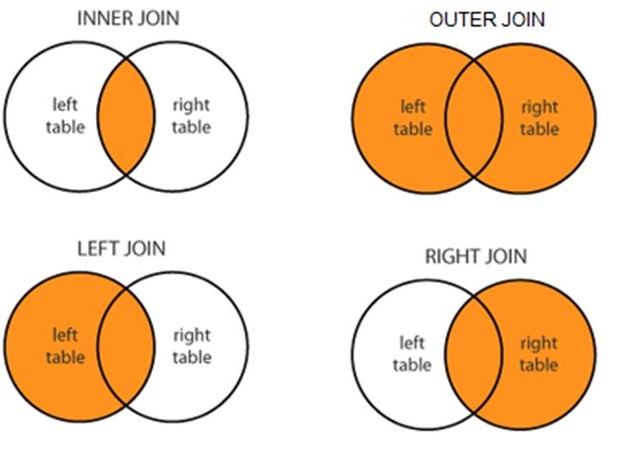

In [40]:
# новый датафрейм должен содержать только те регистрационные номера автомобилей, которые существуют в обоих датафреймах;

inner_df = fines.merge(owners, how='inner', on='CarNumber')
inner_df

,CarNumber,Refund,Fines,Make,Model,Year,SURNAME
0,Y163O8161RUS,2,3200.00,Ford,Focus,1989,RICHARDSON
1,Y163O8161RUS,2,1600.00,Ford,Focus,1999,RICHARDSON
2,E432XX77RUS,1,6500.00,Toyota,Camry,1995,ROSS
3,E432XX77RUS,2,13000.00,Toyota,Camry,1992,ROSS
4,7184TT36RUS,1,2100.00,Ford,Focus,1984,MORGAN
...,...,...,...,...,...,...,...
894,E41977152RUS,2,2400.00,Ford,Focus,2001,BAKER
895,9464EX178RUS,2,2100.00,Ford,Focus,1993,MARTIN
896,O50197197RUS,2,7800.00,Ford,Focus,1986,WRIGHT
897,7608EE777RUS,1,4000.00,Skoda,Octavia,2013,HILL


In [41]:
# новый датафрейм должен содержать все регистрационные номера автомобилей, которые существуют в обоих датафреймах;

outer_df = fines.merge(owners, how='outer', on='CarNumber')
outer_df

,CarNumber,Refund,Fines,Make,Model,Year,SURNAME
0,Y163O8161RUS,2.00,3200.00,Ford,Focus,1989,RICHARDSON
1,Y163O8161RUS,2.00,1600.00,Ford,Focus,1999,RICHARDSON
2,E432XX77RUS,1.00,6500.00,Toyota,Camry,1995,ROSS
3,E432XX77RUS,2.00,13000.00,Toyota,Camry,1992,ROSS
4,7184TT36RUS,1.00,2100.00,Ford,Focus,1984,MORGAN
...,...,...,...,...,...,...,...
928,G7345X197RUS,2.00,1000.00,Lexus,CT,2011,NaN
929,D0011X50RUS,1.00,5000.00,Mitsubishi,ASX,2019,NaN
930,E0001X77RUS,NaN,NaN,NaN,NaN,NaN,JOSE
931,G0777X750RUS,NaN,NaN,NaN,NaN,NaN,SONDRA


In [42]:
# новый датафрейм должен содержать только регистрационные номера автомобилей из пакета данных fines

left_df = fines.merge(owners, how='left', on='CarNumber')
left_df

,CarNumber,Refund,Fines,Make,Model,Year,SURNAME
0,Y163O8161RUS,2,3200.00,Ford,Focus,1989,RICHARDSON
1,E432XX77RUS,1,6500.00,Toyota,Camry,1995,ROSS
2,7184TT36RUS,1,2100.00,Ford,Focus,1984,MORGAN
3,X582HE161RUS,2,2000.00,Ford,Focus,2015,BAILEY
4,92918M178RUS,1,5700.00,Ford,Focus,2014,LOPEZ
...,...,...,...,...,...,...,...
925,A0634X199RUS,1,500.00,Audi,Q3,2014,NaN
926,B6734X190RUS,2,3000.00,BMW,X1,2018,NaN
927,V0799X177RUS,3,6000.00,Infiniti,QX70,2016,NaN
928,G7345X197RUS,2,1000.00,Lexus,CT,2011,NaN


In [43]:
# новый датафрейм должен содержать только регистрационные номера автомобилей из пакета данных owners

right_df = fines.merge(owners, how='right', on='CarNumber')
right_df

,CarNumber,Refund,Fines,Make,Model,Year,SURNAME
0,Y163O8161RUS,2.00,3200.00,Ford,Focus,1989,RICHARDSON
1,Y163O8161RUS,2.00,1600.00,Ford,Focus,1999,RICHARDSON
2,E432XX77RUS,1.00,6500.00,Toyota,Camry,1995,ROSS
3,E432XX77RUS,2.00,13000.00,Toyota,Camry,1992,ROSS
4,7184TT36RUS,1.00,2100.00,Ford,Focus,1984,MORGAN
...,...,...,...,...,...,...,...
897,7608EE777RUS,1.00,4000.00,Skoda,Octavia,2013,HILL
898,7608EE777RUS,1.00,4000.00,Skoda,Octavia,1987,HILL
899,E0001X77RUS,NaN,NaN,NaN,NaN,NaN,JOSE
900,G0777X750RUS,NaN,NaN,NaN,NaN,NaN,SONDRA


<h2>
5. Создайте pivot table (сводную таблицу) из датафрейма fines. Она должна выглядеть следующим образом (значения являются суммами штрафов), но с указанием всех годов (в примере вошли не все). Значения ячеек у вас могут быть другими.

<h5> 
 
```python
        Year	1980	1981	1982	1983	1984
Make	Model					
Dodge	Neon	nan	nan	nan	nan	nan
Ford	Focus	89,194.59	266,783.76	107,283.76	147,289.17	106,000.00
        Mondeo	nan	nan	46,200.00	nan	nan
Honda	CRV	nan	nan	nan	nan	nan
Hyundai	Solaris	nan	nan	nan	nan	nan
Lada	Kalina	nan	nan	nan	nan	nan
Merc	S300	nan	nan	nan	nan	nan
Skoda	Octavia	13,794.59	1,900.00	8,894.59	nan	1,300.00
Toyota	Camry	12,000.00	nan	1,000.00	8,594.59	1,000.00
        Corolla	nan	6,800.00	nan	12,800.00	nan
Volkswagen	Golf	20,800.00	8,594.59	5,000.00	200.00	nan
            Jetta	nan	1,000.00	nan	nan	nan
            Passat	900.00	12,500.00	nan	1,100.00	8,594.59
            Touareg	nan	nan	nan	nan	nan
```

- [pandas.pivot_table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)

In [44]:
fines_pivot_table = pd.pivot_table(fines, values='Fines', index=['Make', 'Model'],
                                   columns=['Year'], aggfunc=np.sum)
fines_pivot_table

Year                   1980      1981      1982      1983      1984      1985  \
Make       Model                                                                
Audi       Q3           NaN       NaN       NaN       NaN       NaN       NaN   
BMW        X1           NaN       NaN       NaN       NaN       NaN       NaN   
Ford       Focus   89194.59 266783.76 107283.76 147289.17 106000.00 307494.59   
           Mondeo       NaN       NaN  46200.00       NaN       NaN       NaN   
Infiniti   QX70         NaN       NaN       NaN       NaN       NaN       NaN   
Lexus      CT           NaN       NaN       NaN       NaN       NaN       NaN   
Mitsubishi ASX          NaN       NaN       NaN       NaN       NaN       NaN   
Skoda      Octavia 13794.59   1900.00   8894.59       NaN   1300.00 153594.59   
Toyota     Camry   12000.00       NaN   1000.00   8594.59   1000.00       NaN   
           Corolla      NaN   6800.00       NaN  12800.00       NaN   4400.00   
Volkswagen Golf    20800.00   8594.59   5000.00    200.00       NaN 168000.00   
           Jetta        NaN   1000.00       NaN       NaN       NaN   9000.00   
           Passat    900.00  12500.00       NaN   1100.00   8594.59       NaN   
           Touareg      NaN       NaN       NaN       NaN       NaN       NaN   

Year                   1986     1987     1988      1989  ...     2014  \
Make       Model                                         ...            
Audi       Q3           NaN      NaN      NaN       NaN  ...      NaN   
BMW        X1           NaN      NaN      NaN       NaN  ...      NaN   
Ford       Focus   69700.00 98189.17 69667.52 200889.17  ... 90378.35   
           Mondeo       NaN      NaN      NaN       NaN  ...      NaN   
Infiniti   QX70         NaN      NaN      NaN       NaN  ...      NaN   
Lexus      CT           NaN      NaN      NaN       NaN  ...      NaN   
Mitsubishi ASX          NaN      NaN      NaN       NaN  ...      NaN   
Skoda      Octavia      NaN  6000.00  5100.00   8594.59  ... 18900.00   
Toyota     Camry   19800.00      NaN      NaN    800.00  ...      NaN   
           Corolla      NaN 54300.00      NaN   7800.00  ...      NaN   
Volkswagen Golf         NaN   300.00      NaN    300.00  ... 13900.00   
           Jetta        NaN      NaN 46000.00   4000.00  ...      NaN   
           Passat  16000.00  2000.00  8594.59       NaN  ... 15000.00   
           Touareg      NaN      NaN      NaN       NaN  ...      NaN   

Year                    2015      2016      2017      2018    2011   2014  \
Make       Model                                                            
Audi       Q3            NaN       NaN       NaN       NaN     NaN 500.00   
BMW        X1            NaN       NaN       NaN       NaN     NaN    NaN   
Ford       Focus   172700.00 110789.17 114089.17 107800.00     NaN    NaN   
           Mondeo        NaN       NaN   8600.00       NaN     NaN    NaN   
Infiniti   QX70          NaN       NaN       NaN       NaN     NaN    NaN   
Lexus      CT            NaN       NaN       NaN       NaN 1000.00    NaN   
Mitsubishi ASX           NaN       NaN       NaN       NaN     NaN    NaN   
Skoda      Octavia  16394.59  35700.00   2400.00 153200.00     NaN    NaN   
Toyota     Camry         NaN    800.00       NaN       NaN     NaN    NaN   
           Corolla  30300.00       NaN   6900.00       NaN     NaN    NaN   
Volkswagen Golf      4600.00       NaN       NaN   1000.00     NaN    NaN   
           Jetta         NaN       NaN       NaN       NaN     NaN    NaN   
           Passat        NaN       NaN       NaN       NaN     NaN    NaN   
           Touareg       NaN       NaN       NaN       NaN     NaN    NaN   

Year                  2016    2018    2019  
Make       Model                            
Audi       Q3          NaN     NaN     NaN  
BMW        X1          NaN 3000.00     NaN  
Ford       Focus       NaN     NaN     NaN  
           Mondeo      NaN     NaN     NaN  
Infiniti   QX70    6000.00     

<h2>
6.Сохраните датафреймы fines и owners в CSV-файлы без индекса.

In [46]:
fines.to_csv('/content/drive/MyDrive/School21/day10/task5/data/fines.csv', index=False)
owners.to_csv('/content/drive/MyDrive/School21/day10/task5/data/owners.csv', index=False)